In [1]:
'''
Data Summary:
We are provided with a wage data of 3000 individuals that have various characteristics such as
age, marital status, education, region, jobclass, health & health_insurace.
We are also provided with individual's Id and logwage.

Objective:
To predict the wage using the regression analysis. 

Steps to perform:
---Data Description
---Data Cleaning
---Data Visualization
---Data Transformation
---Regression Analysis
'''

"\nData Summary:\nWe are provided with a wage data of 3000 individuals that have various characteristics such as\nage, marital status, education, region, jobclass, health & health_insurace.\nWe are also provided with individual's Id and logwage.\n\nObjective:\nTo predict the wage using the regression analysis. \n\nSteps to perform:\n---Data Description\n---Data Cleaning\n---Data Visualization\n---Data Transformation\n---Regression Analysis\n"

# Data Description

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [3]:
wages = pd.read_csv('/Users/Ravi/london-ds-111819/mod_1/supp/python_pre_project/wage.csv')

In [4]:
wages.head()

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [5]:
wages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
Unnamed: 0    3000 non-null int64
year          3000 non-null int64
age           3000 non-null int64
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(3), object(7)
memory usage: 281.4+ KB


In [6]:
#There are no missing values in the data

In [7]:
len(wages['Unnamed: 0'].unique())

3000

# Data Cleaning

In [8]:
wages.rename(columns={'Unnamed: 0': 'id'}, inplace= True) #Renaming the unnamed column as id

# Data Visualization

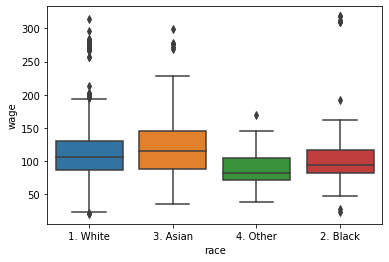

In [9]:
sns.boxplot(x = 'race', y= 'wage', data=wages) 

### We can see from the boxplot that median salaries of Asian are highest and for others it is lowest 

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

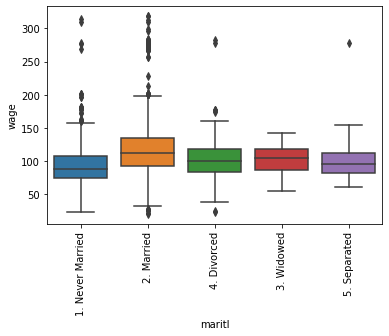

In [10]:
sns.boxplot(x = 'maritl', y= 'wage', data=wages)
plt.xticks(rotation=90)

### We can see from the boxplot that median salaries of Married are highest and for never married it is lowest 

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

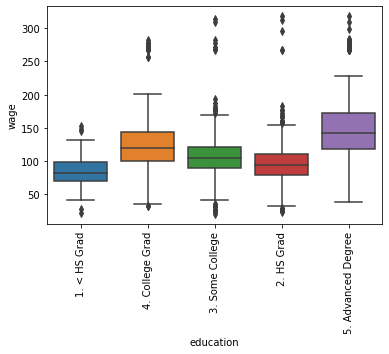

In [11]:
sns.boxplot(x = 'education', y= 'wage', data=wages)
plt.xticks(rotation=90)

### Advanced Degree get the highest salary

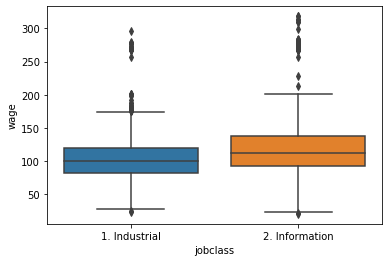

In [12]:
sns.boxplot(x = 'jobclass', y= 'wage', data=wages)

### Median salaries, and upper and lower quartiles of wages are higher if you are working in Information Sector

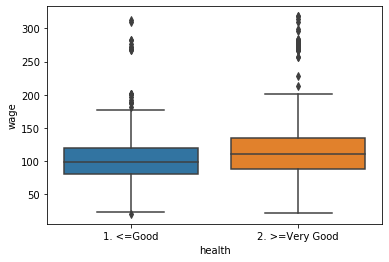

In [13]:
sns.boxplot(x = 'health', y= 'wage', data=wages)

### People with better salary have better health

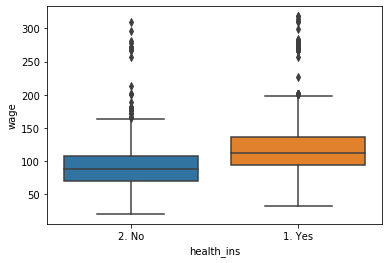

In [14]:
sns.boxplot(x = 'health_ins', y= 'wage', data=wages)

### People with higher salaries have health insurance

# Data Transformation

In [15]:
wages.drop(['id', 'year', 'region'], axis=1, inplace=True) #dropping the id column

In [16]:
wages['maritl'] = wages['maritl'].str.split('.', expand=True)[0].astype(int) #Assigning numbers to marital status

In [17]:
wages['race'] = wages['race'].str.split('.', expand=True)[0].astype(int) #Assigning numbers to race

In [18]:
wages['education'] = wages['education'].str.split('.', expand=True)[0].astype(int) #Assigning numbers to education

In [19]:
wages['health'] = wages['health'].str.split('.', expand=True)[0] #Assigning numbers to health

In [20]:
wages['jobclass'] = wages['jobclass'].str.split('.', expand=True)[0] #Assigning numbers to jobclass

In [21]:
wages['health_ins'] = wages['health_ins'].str.split('.', expand=True)[0] #Assigning numbers to health insurance

In [22]:
wages.head() #Transformed Data

,age,maritl,race,education,jobclass,health,health_ins,logwage,wage
0,18,1,1,1,1,1,2,4.318063,75.043154
1,24,1,1,4,2,2,2,4.255273,70.476020
2,45,2,1,3,1,1,1,4.875061,130.982177
3,43,2,3,4,2,2,1,5.041393,154.685293
4,50,4,1,2,2,1,1,4.318063,75.043154


# Regression Analysis

In [23]:
X = wages.drop('wage', axis=1) #splitting the data into target and attributes

In [24]:
y = wages['wage'] #target data

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #Splitting the data into Test and Train

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
pred = lr.predict(X_test) #Predicted Data

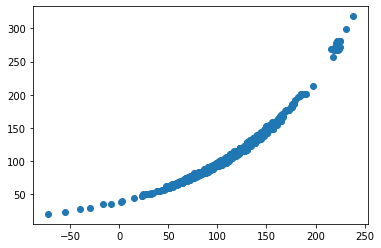

In [30]:
plt.scatter(pred, y_test)

In [31]:
lr.coef_

array([-1.91781346e-02, -6.06927093e-01, -1.30947683e-01,  1.03940270e+00,
        6.09106520e-01, -1.58990603e-02,  4.60646674e+00,  1.13274629e+02])

In [32]:
coeff = pd.DataFrame(data=list(lr.coef_) , index=X.columns, columns=['Coefficients'])

In [33]:
coeff

,Coefficients
age,-0.019178
maritl,-0.606927
race,-0.130948
education,1.039403
jobclass,0.609107
health,-0.015899
health_ins,4.606467
logwage,113.274629


### Top 5 indicators - Logwage, Health Insurance, Jobclass, Education, Marital Status

In [34]:
from sklearn import metrics

In [35]:
mean_sqr = metrics.mean_squared_error(y_test, pred)

In [36]:
Print("Performance Matr")np.sqrt(mean_sqr)

12.284296423406968

In [37]:
metrics.r2_score(y_test, pred)

0.9109881698159724

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(y_test, pred)

0.9109881698159724